In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [157]:
comcast_data = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [158]:
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [159]:
comcast_data['Date_month_year'] = pd.to_datetime(comcast_data["Date_month_year"])

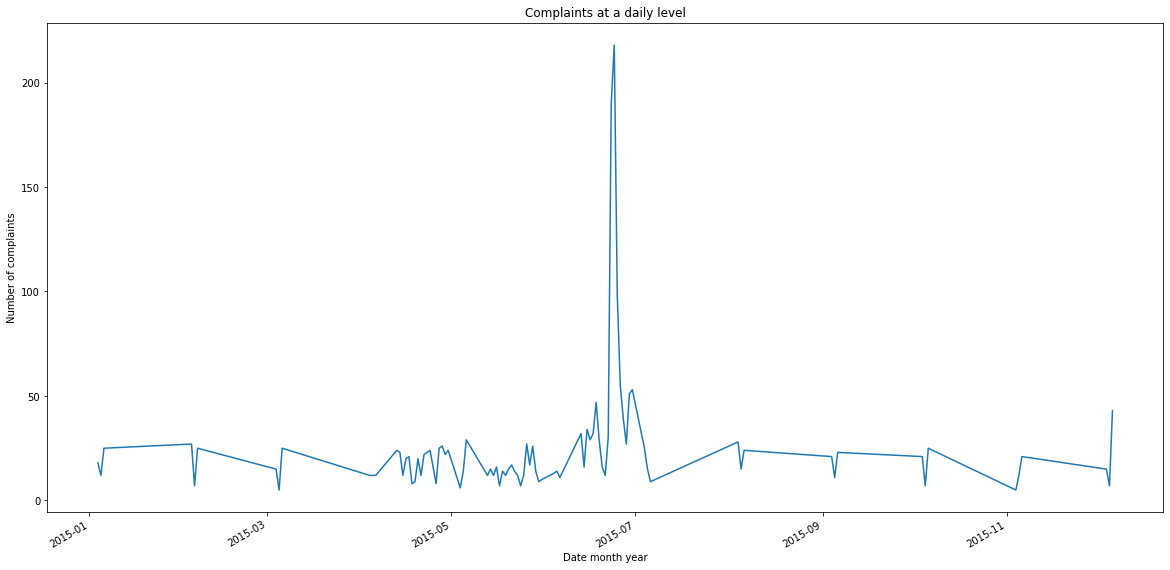

In [160]:
plt.figure(figsize=(20,10))
comcast_data['Date_month_year'].value_counts().plot()
plt.xlabel('Date month year')
plt.ylabel('Number of complaints')
plt.title('Complaints at a daily level')
plt.show()

In [162]:
comcast_data['month'] = pd.DatetimeIndex(comcast_data['Date_month_year']).month
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


In [163]:
comcast_data_month = comcast_data.groupby('month')
comcast_data_month_size = comcast_data_month.size()
comcast_data_month_size

month
1       55
2       59
3       45
4      375
5      317
6     1046
7       49
8       67
9       55
10      53
11      38
12      65
dtype: int64

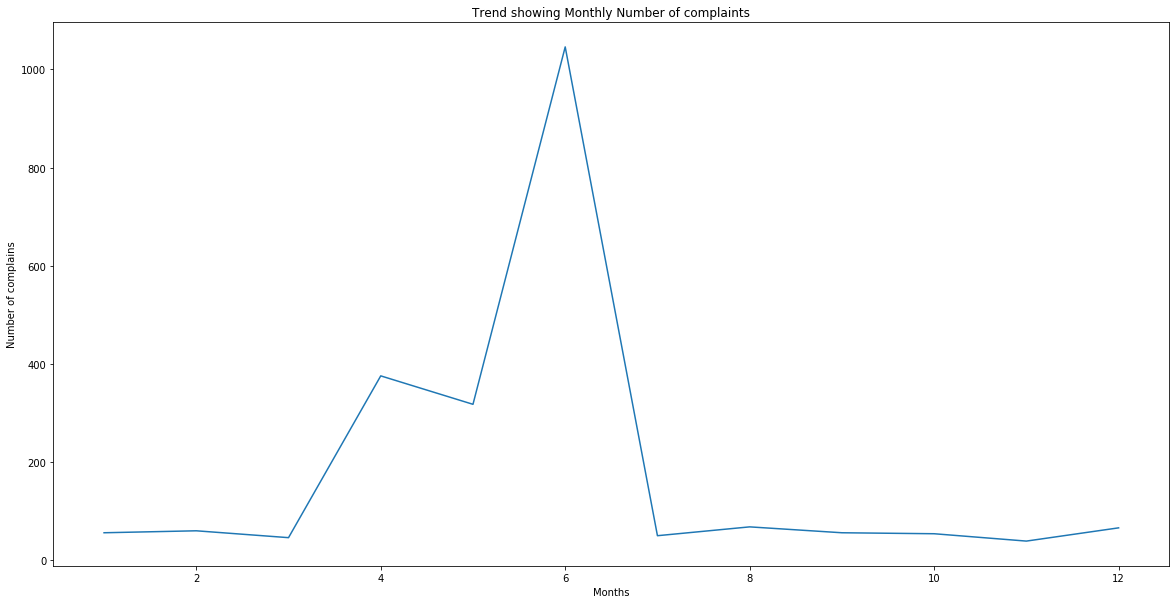

In [164]:
plt.figure(figsize=(20,10))
comcast_data_month_size.plot()
plt.title('Trend showing Monthly Number of complaints')
plt.xlabel('Months')
plt.ylabel('Number of complains')
plt.show()

In [165]:
complaint_types = comcast_data['Customer Complaint'].str.lower().value_counts()
complaint_types.head(n=20)

comcast                      102
comcast data cap              30
comcast internet              29
comcast data caps             21
comcast billing               18
internet speed                15
comcast service               15
unfair billing practices      13
data caps                     13
data cap                      12
comcast/xfinity               11
comcast complaint             11
comcast internet service      10
billing                        9
billing issues                 8
complaint against comcast      5
comcast issues                 5
internet service               5
service issues                 5
comcast cable                  5
Name: Customer Complaint, dtype: int64

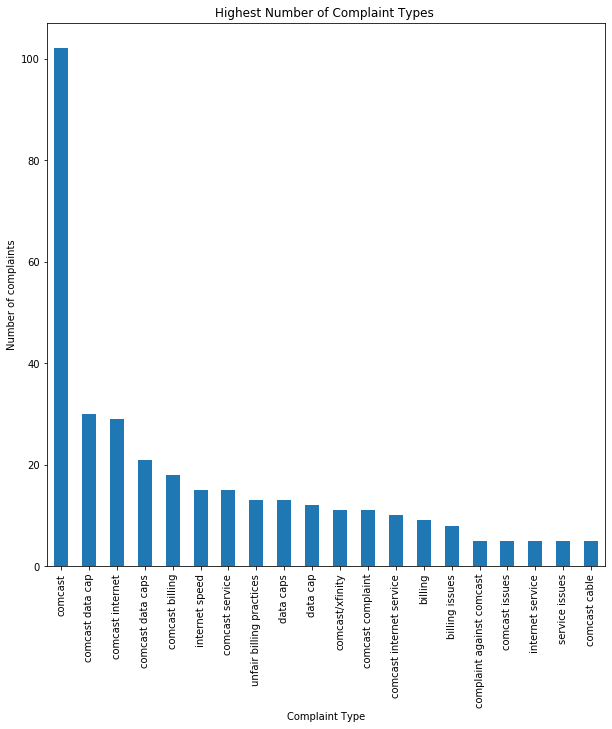

In [167]:
complaint_types_head = complaint_types.head(n=20)
plt.figure(figsize=(10,10))
complaint_types_head.plot.bar()
plt.title('Highest Number of Complaint Types ')
plt.xlabel('Complaint Type')
plt.ylabel('Number of complaints')
plt.show()

The maximum complaint types are from data caps, internet problems, and billing issues and services.

In [168]:
comcast_data.groupby('Status').size()

Status
Closed     734
Open       363
Pending    154
Solved     973
dtype: int64

In [172]:
comcast_data['State'].value_counts()

Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Connecticut              12
Delaware                 12
New Hampshire            12
West Virginia            11
Kentucky                  7
New York                  6
Arkansas                  6
Maine                     5
Missouri                  4
Vermont                   3
North Carolina      

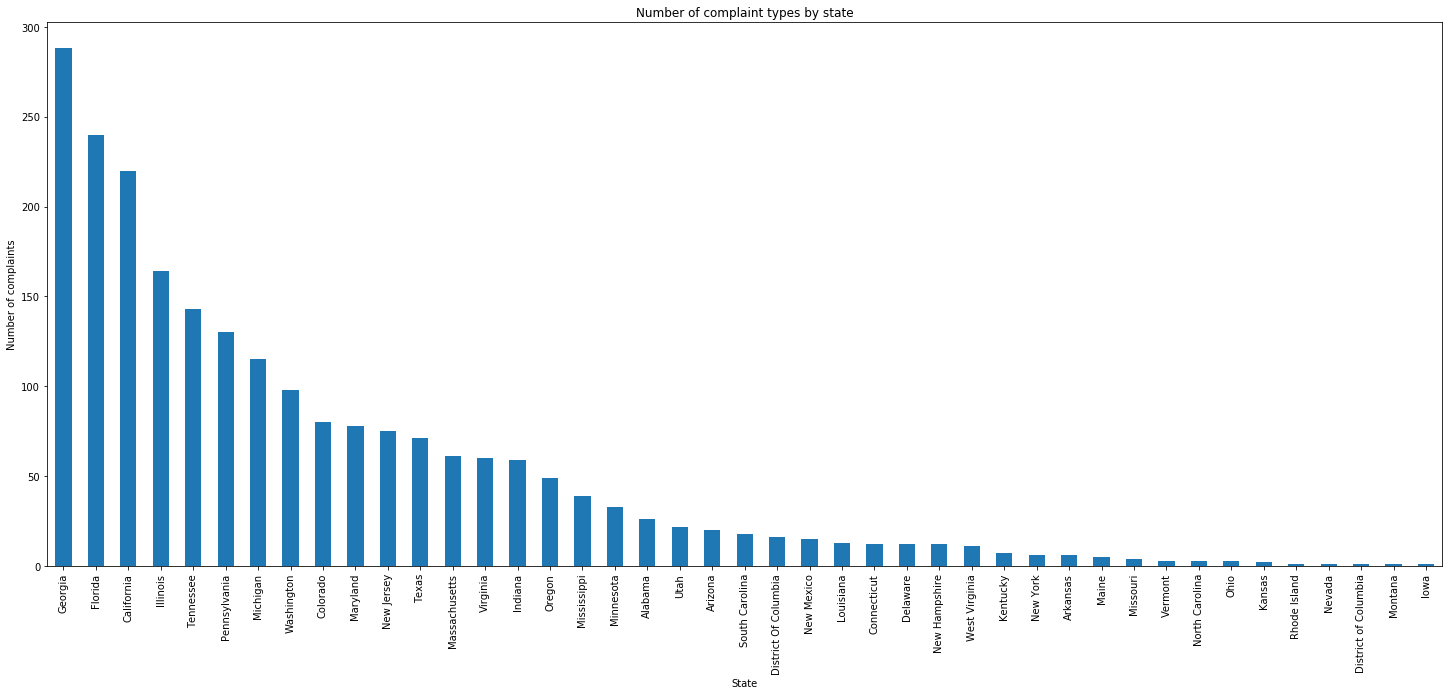

In [174]:
plt.figure(figsize=(25,10))
comcast_data['State'].value_counts().plot.bar()
plt.title('Number of complaint types by state')
plt.xlabel('State')
plt.ylabel('Number of complaints')
plt.show()

In [169]:
comcast_data['Status New'] = comcast_data['Status']

In [170]:
comcast_data['Status New'].replace(('Pending','Solved'),('Open','Closed'),inplace=True)
comcast_data.head(n=10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Status New
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Closed
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,12,Closed
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,6,Open
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,6,Closed
8,318072,Comcast extended outages,06-01-15,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,1,Closed
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,6,Open


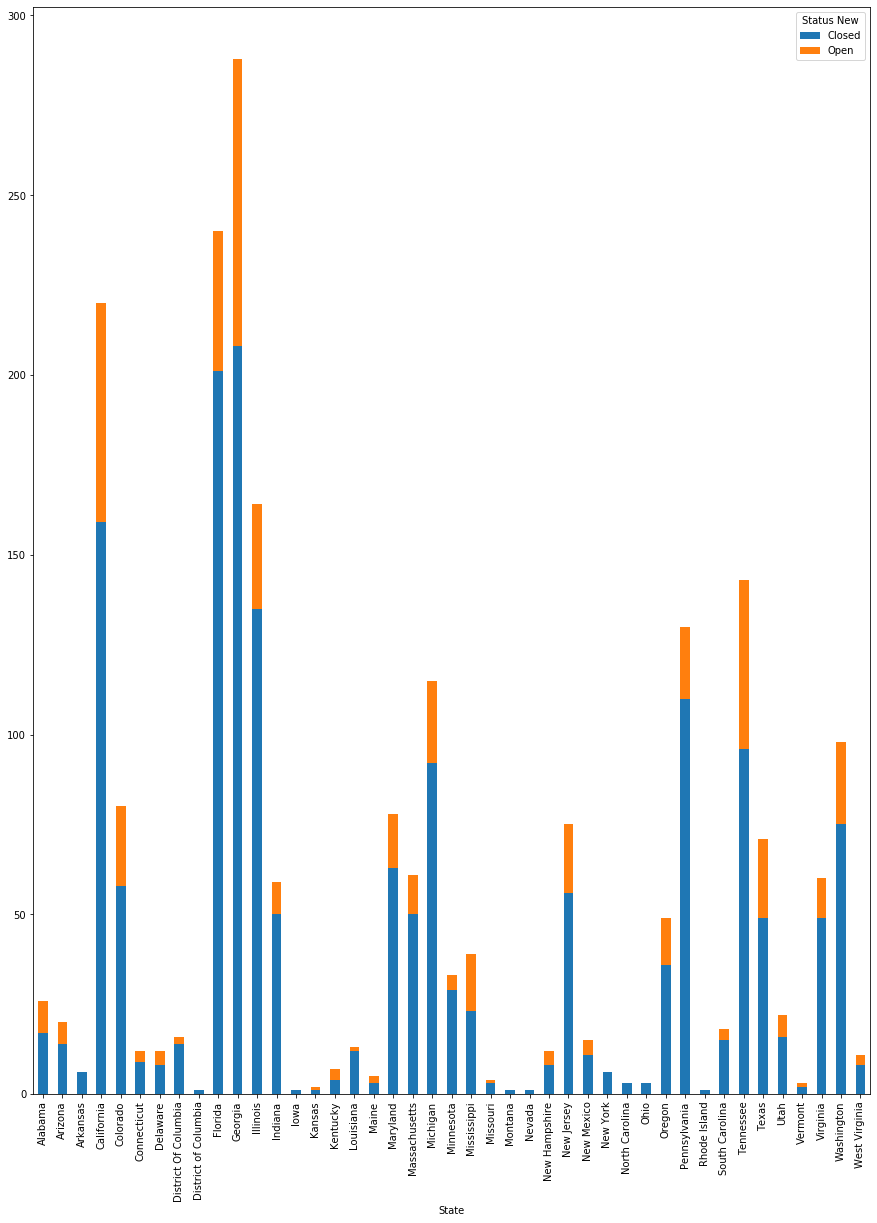

In [175]:
comcast_data.groupby(['State','Status New']).size().unstack().plot(kind="bar", figsize=(15,20),stacked=True)

The state Georgia has the maximum number of complaints (288).

In [141]:
comcast_data.groupby(["State"]).size().max()

288

In [178]:
complaint_by_state = comcast_data.groupby(['State','Status New']).size().unstack().fillna(0)
complaint_by_state

Status New,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


In [181]:
closed_state = []
opened_state = []

for i in range(0, len(complaint_by_state)):
     closed_state.append(complaint_by_state.iloc[i,0])

closed_state = np.array(closed_state)
        
for i in range(0, len(complaint_by_state)):
     opened_state.append(complaint_by_state.iloc[i,1])
        
opened_state = np.array(opened_state)

In [185]:
percentage_opened = (opened_state/(opened_state+closed_state)) * 100
percentage_closed = (closed_state/(opened_state+closed_state)) * 100

In [220]:
dict_complaintByState = complaint_by_state.to_dict()

In [221]:
dict_closed = {} 
dict_opened = {} 

for k, v in dict_complaintByState.items(): 
    if k == 'Closed':
        dict_closed.update(v)
    else:
        dict_opened.update(v)

In [222]:
# Finding a list with only states names
states = []
for keys in dict_closed:
    states.append(keys)

In [223]:
print("Length of states is {} and length of percentage open list is {}". format(len(states), len(percentage_opened)))

Length of states is 43 and length of percentage open list is 43


In [224]:
def find_max_index(percentage_list):
    
    max_index = np.where(percentage_list == np.max(percentage_list))
    return max_index[0]

In [225]:
def convert_to_integer(list_values):
    #convert to string first
    s = [str(i) for i in list_values]   
    # Join list items using join() 
    result = int("".join(s))   
    return result

In [226]:
opened_max_index = convert_to_integer(find_max_index(percentage_opened))

In [227]:
print('Highest Unresolved Percentage is',percentage_opened.max(),'% from', states[opened_max_index])

Highest Unresolved Percentage is 50.0 % from Kansas


In [213]:
comcast_received = comcast_data.groupby(['Received Via', 'Status New']).size()
print(comcast_received)

Received Via        Status New
Customer Care Call  Closed        864
                    Open          255
Internet            Closed        843
                    Open          262
dtype: int64


In [229]:
closed_array = []
opened_array = []
for counter, value in enumerate(comcast_received):
    if counter % 2 == 0:
        closed_array.append(value)
    else:
        opened_array.append(value) 

In [230]:
closed = np.array(closed_array)
opened = np.array(opened_array)

In [231]:
percentage_open = (opened/(opened+closed)) * 100
percentage_close = (closed/(opened+closed)) * 100

In [232]:
print(percentage_open)

[22.78820375 23.71040724]


# Customer Care Call - 22.78% Open
# Internet - 23.71% Open

In [218]:
print(percentage_close)

[77.21179625 76.28959276]


# Customer Care Call - 22.78% close
# Internet - 23.71% close